# Business Problem

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

# Data collection and description

In [4]:
import pandas as pd
import numpy as np

import re 
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs


In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
oneplus_reviews=[]

In [27]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [28]:
oneplus_reviews = list(set(oneplus_reviews))

In [29]:
reviews = oneplus_reviews

In [30]:
reviews

["\nA One plus user.Oneplus One -> Oneplus 3T -> Oneplus 7T.I don't like other android phones due it's UI, love stock android.Camara is awesomeFacing problem with notifications, don't know what at top.I was expecting great battery but its average.As i moved from 3T to 7T, I had to buy wireless headphones and was worried about this. But Bluetooth connection is also good/stable.\n",
 "\nTHIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED. PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE. THERE ARE SO MANY CONS IN THIS PHONE. EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH DISAPPOINTED.HERE ARE MY CONCERNS1. SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS SO POOR. THERE IS GRAINS AND COLOR BANDING ISSUE IN SCREEN. IMAGES LOOKS GRAINY AND UNSHARP IN COMPARISION TO ONE PLUS 5T OR 6T. PHONE RATIO IS 20:9 SO INSTAGRAM IMAGES WILL BE IN SHOWN IN PORTRAIT MODE INSTEAD OF LANDSCAPE MODE. IMAGES ON THE SCREEN IS SO BLURRR

# Text Proccessing

In [31]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'\nA One plus user.Oneplus One -> Oneplus 3T -> Oneplus 7T.I don\'t like other android phones due it\'s UI, love stock android.Camara is awesomeFacing problem with notifications, don\'t know what at top.I was expecting great battery but its average.As i moved from 3T to 7T, I had to buy wireless headphones and was worried about this. But Bluetooth connection is also good/stable.\n \nTHIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED. PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE. THERE ARE SO MANY CONS IN THIS PHONE. EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH DISAPPOINTED.HERE ARE MY CONCERNS1. SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS SO POOR. THERE IS GRAINS AND COLOR BANDING ISSUE IN SCREEN. IMAGES LOOKS GRAINY AND UNSHARP IN COMPARISION TO ONE PLUS 5T OR 6T. PHONE RATIO IS 20:9 SO INSTAGRAM IMAGES WILL BE IN SHOWN IN PORTRAIT MODE INSTEAD OF LANDSCAPE MODE. IMAGES ON THE SCREEN IS SO BLURRRY2

In [33]:
# Remove Punctuations
import string
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'\nA One plus userOneplus One  Oneplus 3T  Oneplus 7TI dont like other android phones due its UI love stock androidCamara is awesomeFacing problem with notifications dont know what at topI was expecting great battery but its averageAs i moved from 3T to 7T I had to buy wireless headphones and was worried about this But Bluetooth connection is also goodstable\n \nTHIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE THERE ARE SO MANY CONS IN THIS PHONE EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH DISAPPOINTEDHERE ARE MY CONCERNS1 SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS SO POOR THERE IS GRAINS AND COLOR BANDING ISSUE IN SCREEN IMAGES LOOKS GRAINY AND UNSHARP IN COMPARISION TO ONE PLUS 5T OR 6T PHONE RATIO IS 209 SO INSTAGRAM IMAGES WILL BE IN SHOWN IN PORTRAIT MODE INSTEAD OF LANDSCAPE MODE IMAGES ON THE SCREEN IS SO BLURRRY2 DESIGN OF THE PHONE IS MESS SO

In [34]:
# Remove Punctuations
import string
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['A', 'One', 'plus', 'userOneplus', 'One', 'Oneplus', '3T', 'Oneplus', '7TI', 'dont', 'like', 'other', 'android', 'phones', 'due', 'its', 'UI', 'love', 'stock', 'androidCamara', 'is', 'awesomeFacing', 'problem', 'with', 'notifications', 'dont', 'know', 'what', 'at', 'topI', 'was', 'expecting', 'great', 'battery', 'but', 'its', 'averageAs', 'i', 'moved', 'from', '3T', 'to', '7T', 'I', 'had', 'to', 'buy', 'wireless', 'headphones', 'and']


In [36]:
len(text_tokens)

1691

In [37]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['One', 'plus', 'userOneplus', 'One', 'Oneplus', '3T', 'Oneplus', '7TI', 'dont', 'like', 'android', 'phones', 'due', 'UI', 'love', 'stock', 'androidCamara', 'awesomeFacing', 'problem', 'notifications', 'dont', 'know', 'topI', 'expecting', 'great', 'battery', 'averageAs', 'moved', '3T', '7T', 'buy', 'wireless', 'headphones', 'worried', 'But', 'Bluetooth', 'connection', 'also', 'goodstable', 'THIS', 'IS', 'ONE', 'OF', 'THE', 'WORST', 'PHONE', 'HAVE', 'EVER', 'PURCHASED', 'PLEASE', 'DONT', 'BUY', 'THIS', 'PHONE', 'AND', 'PUT', 'YOUR', 'HARD', 'EARNED', 'MONEY', 'ON', 'STAKE', 'THERE', 'ARE', 'SO', 'MANY', 'CONS', 'IN', 'THIS', 'PHONE', 'EARLIER', 'HAVE', 'USED', 'ONE', 'PLUS', '5T', 'PHONE', 'SO', 'KNEW', 'WHAT', 'TO', 'EXPECT', 'FROM', 'THIS', 'PHONE', 'BUT', 'THIS', 'TIME', 'AM', 'SO', 'MUCH', 'DISAPPOINTEDHERE', 'ARE', 'MY', 'CONCERNS1', 'SCREEN', 'RESOLUTION', 'AND', 'QUALITY', 'OF', 'THE', 'SCREEN', 'IS', 'SO', 'POOR', 'THERE', 'IS', 'GRAINS', 'AND', 'COLOR', 'BANDING', 'ISSUE', 'IN'

In [38]:
#Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['one', 'plus', 'useroneplus', 'one', 'oneplus', '3t', 'oneplus', '7ti', 'dont', 'like', 'android', 'phones', 'due', 'ui', 'love', 'stock', 'androidcamara', 'awesomefacing', 'problem', 'notifications', 'dont', 'know', 'topi', 'expecting', 'great', 'battery', 'averageas', 'moved', '3t', '7t', 'buy', 'wireless', 'headphones', 'worried', 'but', 'bluetooth', 'connection', 'also', 'goodstable', 'this', 'is', 'one', 'of', 'the', 'worst', 'phone', 'have', 'ever', 'purchased', 'please', 'dont', 'buy', 'this', 'phone', 'and', 'put', 'your', 'hard', 'earned', 'money', 'on', 'stake', 'there', 'are', 'so', 'many', 'cons', 'in', 'this', 'phone', 'earlier', 'have', 'used', 'one', 'plus', '5t', 'phone', 'so', 'knew', 'what', 'to', 'expect', 'from', 'this', 'phone', 'but', 'this', 'time', 'am', 'so', 'much', 'disappointedhere', 'are', 'my', 'concerns1', 'screen', 'resolution', 'and', 'quality', 'of', 'the', 'screen', 'is', 'so', 'poor', 'there', 'is', 'grains', 'and', 'color', 'banding', 'issue', 'in'

In [39]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['one', 'plu', 'useroneplu', 'one', 'oneplu', '3t', 'oneplu', '7ti', 'dont', 'like', 'android', 'phone', 'due', 'ui', 'love', 'stock', 'androidcamara', 'awesomefac', 'problem', 'notif', 'dont', 'know', 'topi', 'expect', 'great', 'batteri', 'averagea', 'move', '3t', '7t', 'buy', 'wireless', 'headphon', 'worri', 'but', 'bluetooth', 'connect', 'also', 'goodstabl', 'thi', 'is', 'one', 'of', 'the', 'worst', 'phone', 'have', 'ever', 'purchas', 'pleas', 'dont', 'buy', 'thi', 'phone', 'and', 'put', 'your', 'hard', 'earn', 'money', 'on', 'stake', 'there', 'are', 'so', 'mani', 'con', 'in', 'thi', 'phone', 'earlier', 'have', 'use', 'one', 'plu', '5t', 'phone', 'so', 'knew', 'what', 'to', 'expect', 'from', 'thi', 'phone', 'but', 'thi', 'time', 'am', 'so', 'much', 'disappointedher', 'are', 'my', 'concerns1', 'screen', 'resolut', 'and', 'qualiti', 'of', 'the', 'screen', 'is', 'so', 'poor', 'there', 'is', 'grain', 'and', 'color', 'band', 'issu', 'in', 'screen', 'imag', 'look', 'graini', 'and', 'unsha

In [41]:
# Lemmatization
import spacy

nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

one plus useroneplus one oneplus 3t oneplus 7ti dont like android phones due ui love stock androidcamara awesomefacing problem notifications dont know topi expecting great battery averageas moved 3t 7t buy wireless headphones worried but bluetooth connection also goodstable this is one of the worst phone have ever purchased please dont buy this phone and put your hard earned money on stake there are so many cons in this phone earlier have used one plus 5t phone so knew what to expect from this phone but this time am so much disappointedhere are my concerns1 screen resolution and quality of the screen is so poor there is grains and color banding issue in screen images looks grainy and unsharp in comparision to one plus 5t or 6t phone ratio is 209 so instagram images will be in shown in portrait mode instead of landscape mode images on the screen is so blurrry2 design of the phone is mess so much camera bulk even the provided case can not protect it from scratches phone is very fat and h

In [42]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['one', 'plus', 'useroneplus', 'one', 'oneplus', '3', 't', 'oneplus', '7ti', 'do', 'not', 'like', 'android', 'phone', 'due', 'ui', 'love', 'stock', 'androidcamara', 'awesomeface', 'problem', 'notification', 'do', 'not', 'know', 'topi', 'expect', 'great', 'battery', 'averagea', 'move', '3', 't', '7', 't', 'buy', 'wireless', 'headphone', 'worry', 'but', 'bluetooth', 'connection', 'also', 'goodstable', 'this', 'be', 'one', 'of', 'the', 'bad', 'phone', 'have', 'ever', 'purchase', 'please', 'do', 'not', 'buy', 'this', 'phone', 'and', 'put', 'your', 'hard', 'earn', 'money', 'on', 'stake', 'there', 'be', 'so', 'many', 'con', 'in', 'this', 'phone', 'early', 'have', 'use', 'one', 'plus', '5', 't', 'phone', 'so', 'know', 'what', 'to', 'expect', 'from', 'this', 'phone', 'but', 'this', 'time', 'be', 'so', 'much', 'disappointedhere', 'be', 'my', 'concerns1', 'screen', 'resolution', 'and', 'quality', 'of', 'the', 'screen', 'be', 'so', 'poor', 'there', 'be', 'grain', 'and', 'color', 'banding', 'issue

In [43]:
clean_reviews=' '.join(lemmas)
clean_reviews

"one plus useroneplus one oneplus 3 t oneplus 7ti do not like android phone due ui love stock androidcamara awesomeface problem notification do not know topi expect great battery averagea move 3 t 7 t buy wireless headphone worry but bluetooth connection also goodstable this be one of the bad phone have ever purchase please do not buy this phone and put your hard earn money on stake there be so many con in this phone early have use one plus 5 t phone so know what to expect from this phone but this time be so much disappointedhere be my concerns1 screen resolution and quality of the screen be so poor there be grain and color banding issue in screen image look grainy and unsharp in comparision to one plus 5 t or 6 t phone ratio be 209 so instagram image will be in show in portrait mode instead of landscape mode image on the screen be so blurrry2 design of the phone be mess so much camera bulk even the provide case can not protect it from scratch phone be very fat and haevy length be also

# Emotion Mining - Sentiment Analysis

In [44]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

["\nA One plus user.Oneplus One -> Oneplus 3T -> Oneplus 7T.I don't like other android phones due it's UI, love stock android.Camara is awesomeFacing problem with notifications, don't know what at top.I was expecting great battery but its average.As i moved from 3T to 7T, I had to buy wireless headphones and was worried about this.",
 'But Bluetooth connection is also good/stable.',
 'THIS IS ONE OF THE WORST PHONE I HAVE EVER PURCHASED.',
 'PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD EARNED MONEY ON STAKE.',
 'THERE ARE SO MANY CONS IN THIS PHONE.',
 'EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNEW WHAT TO EXPECT FROM THIS PHONE BUT THIS TIME I AM SO MUCH DISAPPOINTED.HERE ARE MY CONCERNS1.',
 'SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS SO POOR.',
 'THERE IS GRAINS AND COLOR BANDING ISSUE IN SCREEN.',
 'IMAGES LOOKS GRAINY AND UNSHARP IN COMPARISION TO ONE PLUS 5T OR 6T.',
 'PHONE RATIO IS 20:9 SO INSTAGRAM IMAGES WILL BE IN SHOWN IN PORTRAIT MODE INSTEAD OF LANDSCAPE MODE.',
 'I

In [45]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,\nA One plus user.Oneplus One -> Oneplus 3T ->...
1,But Bluetooth connection is also good/stable.
2,THIS IS ONE OF THE WORST PHONE I HAVE EVER PUR...
3,PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD E...
4,THERE ARE SO MANY CONS IN THIS PHONE.
...,...
82,How can a consumer aspects from a reputed bran...
83,Charging is fast as per the Oneplus standards ...
84,What is concerning me is the heating issue whi...
85,The Battery drains quickly so we have to keep ...


In [46]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [47]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [48]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [49]:
# manual testing
calculate_sentiment(text='good service')

3

In [50]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     5
1     5
2    -3
3     0
4     0
     ..
82    5
83    0
84    0
85    0
86    0
Name: sentiment_value, Length: 87, dtype: int64

In [51]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     56
1      6
2     11
3     13
4      8
      ..
82    23
83    12
84    14
85    15
86     8
Name: word_count, Length: 87, dtype: int64

In [52]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
2,THIS IS ONE OF THE WORST PHONE I HAVE EVER PUR...,-3,11
80,I received the ph with manufacturing defect in...,-3,9
43,So I continued clicking pictures which really ...,-2,9
67,Now they are launching 7t pro on Oct 10 again ...,-2,22
68,Maybe their R&D or trials have some problem he...,-2,27
...,...,...,...
36,A regular user who wants to do all the office ...,7,79
75,"Its smooth, fast and you can't come out of it....",8,18
28,The camera performance is great.There are very...,8,44
79,Awesome experience..best in class camera... ox...,8,16


In [53]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    87.000000
mean      1.160920
std       3.569488
min      -3.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      27.000000
Name: sentiment_value, dtype: float64

In [54]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
2,THIS IS ONE OF THE WORST PHONE I HAVE EVER PUR...,-3,11
3,PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD E...,0,13
4,THERE ARE SO MANY CONS IN THIS PHONE.,0,8
5,EARLIER I HAVE USED ONE PLUS 5T PHONE SO I KNE...,0,28
6,SCREEN RESOLUTION AND QUALITY OF THE SCREEN IS...,0,10
...,...,...,...
81,Gum came out from the edges of display.,0,8
83,Charging is fast as per the Oneplus standards ...,0,12
84,What is concerning me is the heating issue whi...,0,14
85,The Battery drains quickly so we have to keep ...,0,15


In [55]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,\nA One plus user.Oneplus One -> Oneplus 3T ->...,5,56
1,But Bluetooth connection is also good/stable.,5,6
13,EVEN THE PROVIDED CASE CANNOT PROTECT IT FROM ...,1,9
17,3.5MM JACK IS BIG OMMISSION SINCE ONE PLUS 6 P...,1,10
18,THERE IS NO BENEFIT OF REMOVING IT.,1,7
20,ALSO YOU HAVE TO BUY A SEPERATE ADAPTER OR NEW...,3,24
24,PLEASE DONT WASTE YOUR MONEY.,1,5
25,Detailed review --Design - 4/5+Reduced notch+P...,3,83
27,OP 7T is the best of OP 7 and OP 7 pro at a go...,27,309
28,The camera performance is great.There are very...,8,44


In [56]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,\nA One plus user.Oneplus One -> Oneplus 3T ->...,5,56,0
1,But Bluetooth connection is also good/stable.,5,6,1
2,THIS IS ONE OF THE WORST PHONE I HAVE EVER PUR...,-3,11,2
3,PLEASE DONT BUY THIS PHONE AND PUT YOUR HARD E...,0,13,3
4,THERE ARE SO MANY CONS IN THIS PHONE.,0,8,4
...,...,...,...,...
82,How can a consumer aspects from a reputed bran...,5,23,82
83,Charging is fast as per the Oneplus standards ...,0,12,83
84,What is concerning me is the heating issue whi...,0,14,84
85,The Battery drains quickly so we have to keep ...,0,15,85


C:\Users\user\EXCELR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

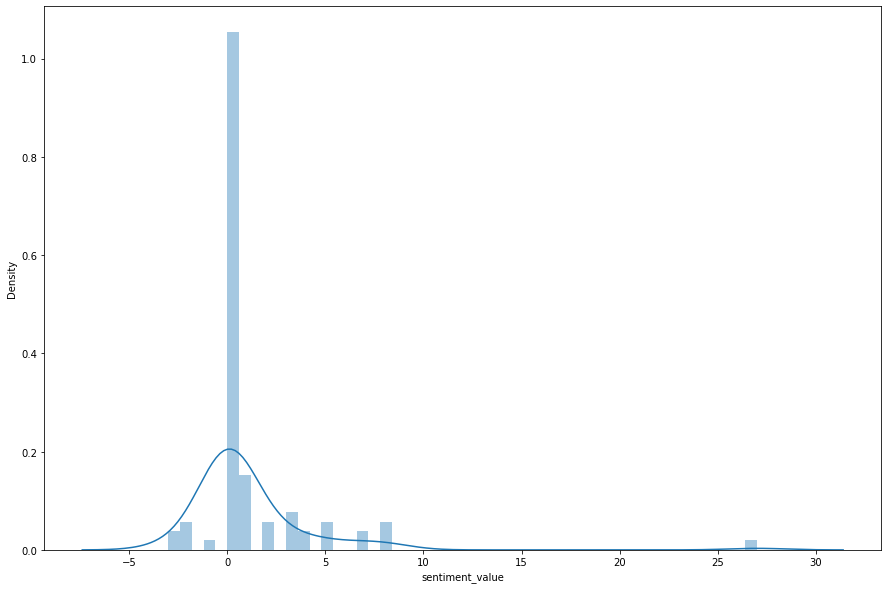

In [57]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

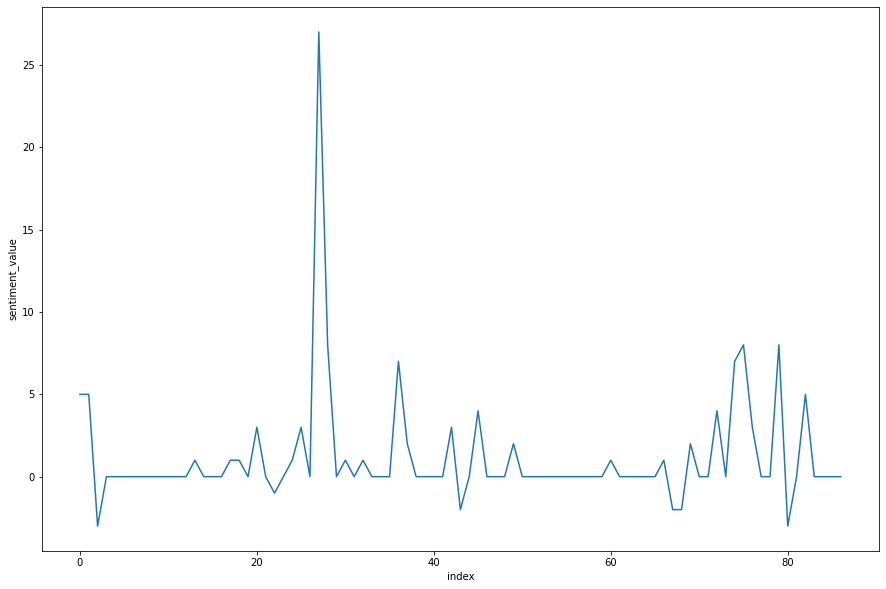

In [58]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)